___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
# Importing the libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
np.__version__

'1.21.6'

In [3]:
!pip install livelossplot --quiet

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from livelossplot import PlotLossesKerasTF

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling (1).csv to Churn_Modelling (1).csv


In [6]:
data = pd.read_csv('/content/Churn_Modelling (1).csv', index_col='RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.9,1
2,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112542.6,0
3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.6,1
4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.8,1,1,1,79084.1,0


In [7]:
df = data.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.shape

(10000, 13)

In [12]:
len(df)

10000

In [13]:
df.duplicated().sum()/len(df)*100

0.0

In [14]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,15690940.6,71936.2,15565701.0,15628528.2,15690738.0,15753233.8,15815690.0
CreditScore,10000.0,650.5,96.7,350.0,584.0,652.0,718.0,850.0
Age,10000.0,38.9,10.5,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,2.9,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76485.9,62397.4,0.0,0.0,97198.5,127644.2,250898.1
NumOfProducts,10000.0,1.5,0.6,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.2,57510.5,11.6,51002.1,100193.9,149388.2,199992.5
Exited,10000.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


In [15]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [16]:
#we don't need customer Id or Surname
df.drop(['CustomerId','Surname'], axis = 1, inplace=True)

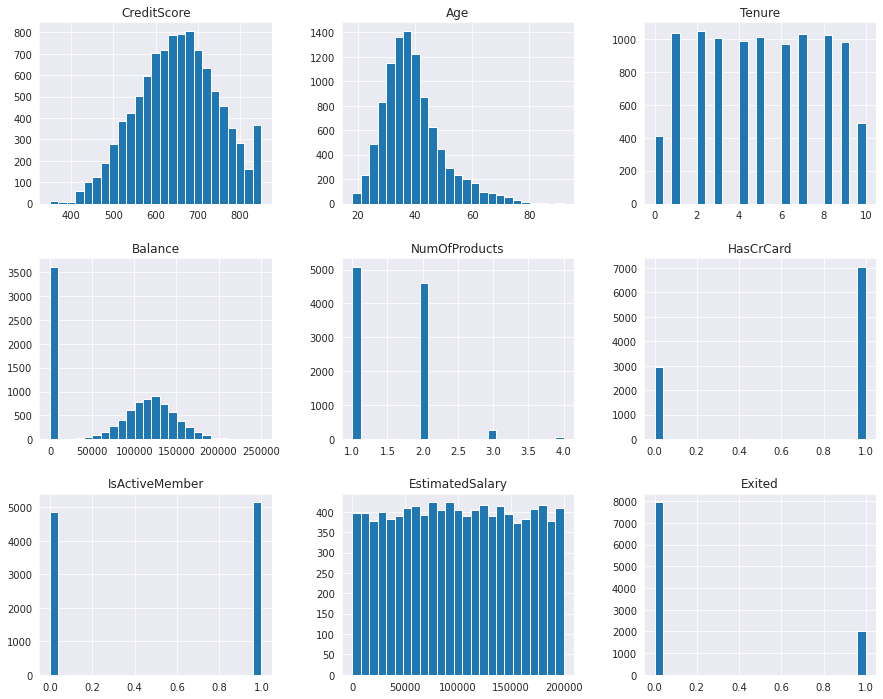

In [17]:
df.hist(figsize=(15, 12), bins=25);

Target "Exited"

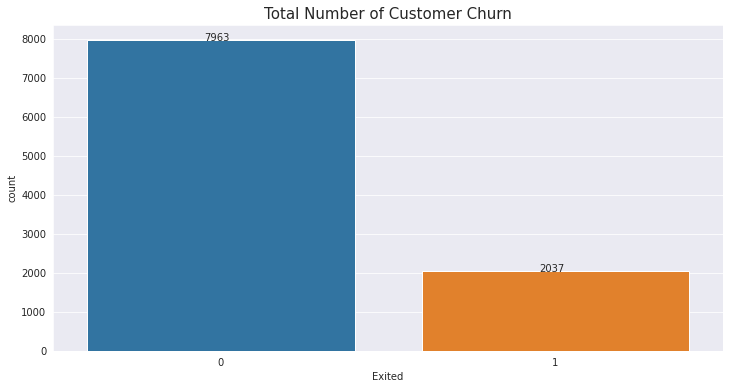

In [18]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x="Exited")
ax.set_title("Total Number of Customer Churn", fontsize=15)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.35, p.get_height() * 1.0));    

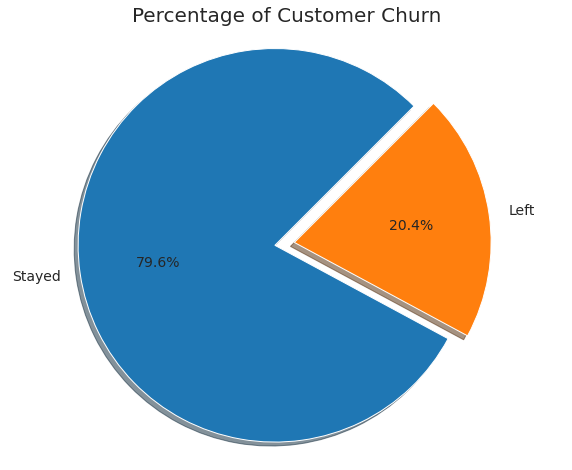

In [19]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(x=df.Exited.value_counts(), 
       labels=['Stayed', 'Left'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       textprops={'fontsize': 14},
       shadow=True,
       startangle=45
       )

ax.axis('equal')

plt.title("Percentage of Customer Churn", fontdict={'fontsize': 20})
plt.show()

Exited by Gender

In [20]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

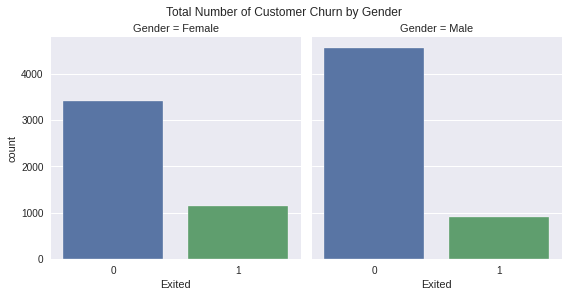

In [22]:
sns.set_style("whitegrid")
plt.style.use('seaborn')

p = sns.catplot(
    data=df, x="Exited" , col= "Gender",
    kind="count", height=4, aspect=1, hue =None
);

p.fig.suptitle("Total Number of Customer Churn by Gender", y=1.02);
# for bars in ax.containers:
#         ax.bar_label(bars, fmt='%.f', size=12)

Exited by Age

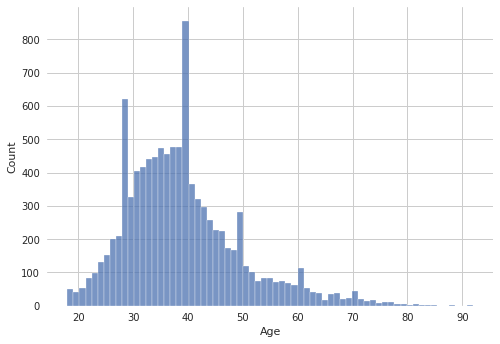

In [23]:
sns.set_style("whitegrid")
sns.histplot(x="Age", data=df);

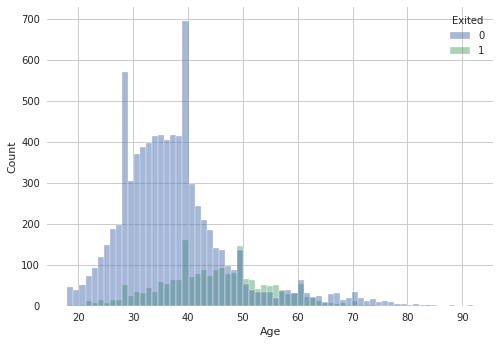

In [24]:
sns.histplot(x='Age', hue='Exited', data=df, alpha=0.5);

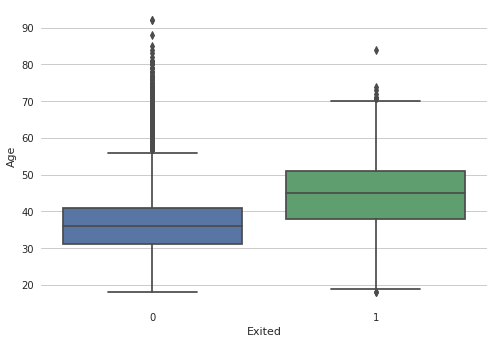

In [25]:
sns.set_style("whitegrid")
sns.boxplot(y='Age', x='Exited', data=df);

Exited by Estimated Salary

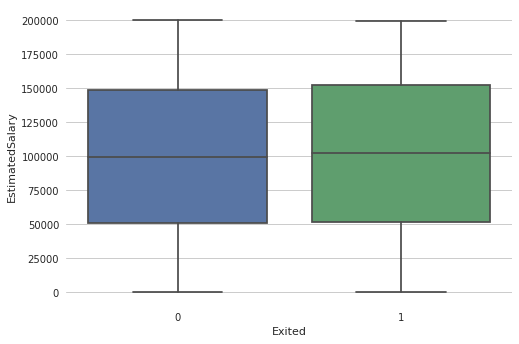

In [26]:
sns.boxplot(data = df ,x="Exited",y="EstimatedSalary");

Exited by Credit Score

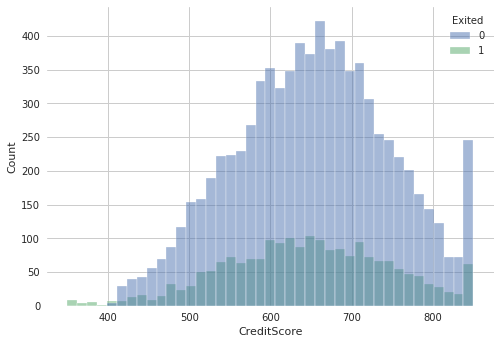

In [27]:
sns.histplot(x='CreditScore',data=df, hue='Exited');

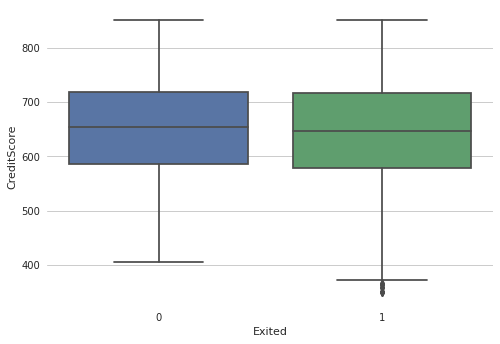

In [28]:
sns.boxplot(y='CreditScore', x='Exited', data=df)

Geography

In [29]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [30]:
df2 = df.copy()
df2.tail(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
9998,709,France,Female,36,7,0.0,1,0,1,42085.6,1
9999,772,Germany,Male,42,3,75075.3,2,1,0,92888.5,1
10000,792,France,Female,28,4,130142.8,1,1,0,38190.8,0


Exited by NumofProducts

In [31]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

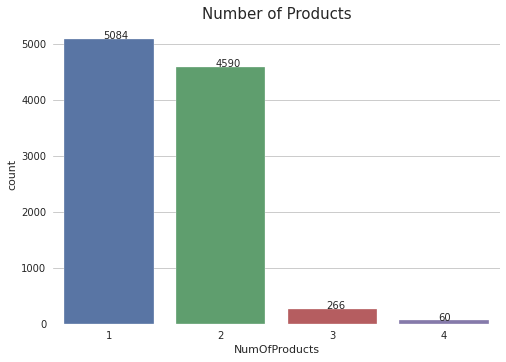

In [32]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x='NumOfProducts')
ax.set_title("Number of Products", fontsize=15)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.35, p.get_height() * 1.0)); 

In [33]:
df.groupby('NumOfProducts')['Exited'].sum()

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

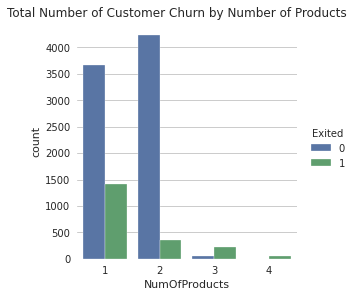

In [34]:
p = sns.catplot(
    data=df, x="NumOfProducts" , kind="count", height=4, aspect=1, hue ="Exited"
);

p.fig.suptitle("Total Number of Customer Churn by Number of Products", y=1.02);
# for bars in ax.containers:
#         ax.bar_label(bars, fmt='%.f', size=12)

Exited by Is a Active Member

In [35]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [36]:
df.groupby('IsActiveMember')['Exited'].sum()

IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

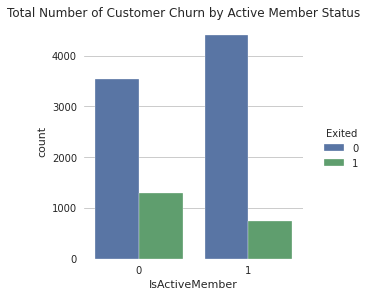

In [37]:
p = sns.catplot(
    data=df, x="IsActiveMember" , kind="count", height=4, aspect=1, hue ="Exited"
);

p.fig.suptitle("Total Number of Customer Churn by Active Member Status", y=1.02);
# for bars in ax.containers:
#         ax.bar_label(bars, fmt='%.f', size=12)

Correlation with Exited

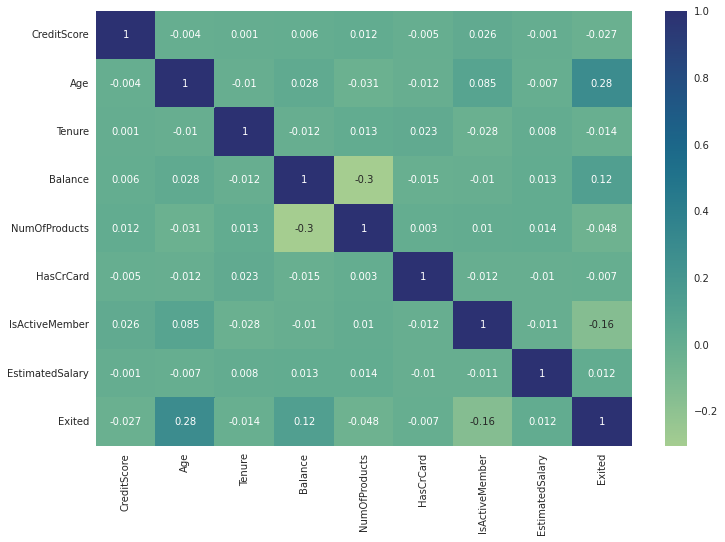

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(3), annot=True, cmap='crest');

In [39]:
df.corr()[['Exited']].sort_values(by='Exited', ascending=False)

,Exited
Exited,1.0
Age,0.3
Balance,0.1
EstimatedSalary,0.0
HasCrCard,-0.0
Tenure,-0.0
CreditScore,-0.0
NumOfProducts,-0.0
IsActiveMember,-0.2


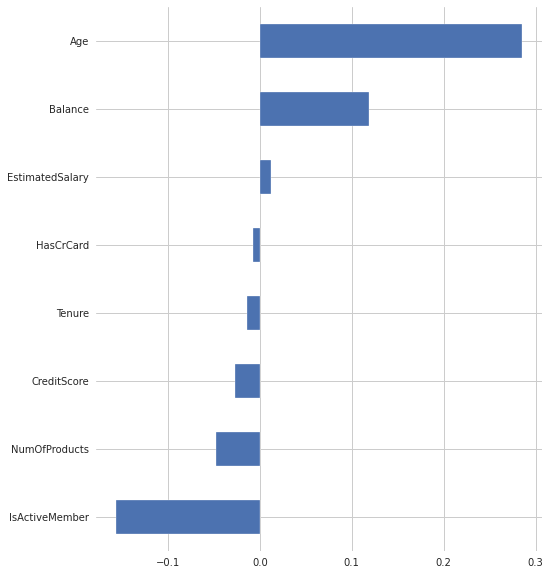

In [40]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

In [41]:
#The is the last step before starting the processing before the model
#Change value in country column
df.rename(columns = {'Exited':'Churn'}, inplace = True)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.0,1,1,1,101348.9,1
2,608,Spain,Female,41,1,83807.9,1,0,1,112542.6,0


In [42]:
df.shape

(10000, 11)

In [43]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [42]:
#Change value in country column
# df['country'] = df['Geography'].replace(['Germany'],'0')
# df['country'] = df['Geography'].replace(['France'],'1')
# df['country'] = df['Geography'].replace(['Spain'],'2')
#Change value in gender column
# df['Gender'] = df['Gender'].replace(['Female'],'0')
# df['Gender'] = df['Gender'].replace(['Male'],'1')

# Preprocessing of Data
- Train | Test Split, Scalling

In [44]:
X = df.drop('Churn', axis=1)
y = df['Churn'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

In [46]:
X_train.shape

(8500, 10)

In [47]:
X_test.shape

(1500, 10)

In [48]:
cat_columns = X_train.select_dtypes(include=['object', 'bool']).columns
OHE = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")

In [49]:
transformers = [('cat', OHE, cat_columns)]

column_trans = ColumnTransformer(transformers=transformers,remainder='passthrough')

In [50]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [53]:
tf.__version__

'2.9.2'

In [54]:
X_train.shape

(8500, 13)

In [55]:
tf.random.set_seed(42) 

model = Sequential() 

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1])) 
model.add(Dense(8, activation="relu"))  
model.add(Dense(1, activation="sigmoid"))  
opt = Adam(lr=0.001) 
model.compile(optimizer=opt, loss="binary_crossentropy",metrics=["Recall"]) 

In [56]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1)

Epoch 1/400
240/240 [==============================] - 2s 3ms/step - loss: 0.5124 - recall: 0.0013 - val_loss: 0.4823 - val_recall: 0.0000e+00
Epoch 2/400
240/240 [==============================] - 0s 2ms/step - loss: 0.4713 - recall: 0.0045 - val_loss: 0.4652 - val_recall: 0.0176
Epoch 3/400
240/240 [==============================] - 0s 1ms/step - loss: 0.4531 - recall: 0.0577 - val_loss: 0.4536 - val_recall: 0.0941
Epoch 4/400
240/240 [==============================] - 0s 1ms/step - loss: 0.4366 - recall: 0.1185 - val_loss: 0.4399 - val_recall: 0.1118
Epoch 5/400
240/240 [==============================] - 0s 1ms/step - loss: 0.4236 - recall: 0.1640 - val_loss: 0.4265 - val_recall: 0.1588
Epoch 6/400
240/240 [==============================] - 0s 2ms/step - loss: 0.4109 - recall: 0.2197 - val_loss: 0.4139 - val_recall: 0.2118
Epoch 7/400
240/240 [==============================] - 0s 2ms/step - loss: 0.4000 - recall: 0.2550 - val_loss: 0.4023 - val_recall: 0.2765
Epoch 8/400
240/240 [==

In [178]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                224       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [179]:
dense = 13 * 16 + 16
dense

224

In [180]:
model.weights

[<tf.Variable 'dense_18/kernel:0' shape=(13, 16) dtype=float32, numpy=
 array([[ 2.18138129e-01, -5.36671877e-02,  3.89266580e-01,
         -3.11282545e-01, -2.40630075e-01,  7.61595219e-02,
          8.32387507e-02,  7.16976821e-01, -1.46985710e-01,
         -2.73243010e-01,  3.17515999e-01, -1.57835215e-01,
         -2.58213371e-01,  5.17366678e-02,  1.61526695e-01,
          2.85275102e-01],
        [-1.00833404e+00,  1.93139315e-02,  2.65822202e-01,
         -3.53587270e-01,  1.10866673e-01, -2.53765762e-01,
         -5.33916891e-01,  8.35368992e-04,  1.15782745e-01,
         -4.70939934e-01,  1.70618221e-01,  1.05610177e-01,
          4.23165351e-01,  8.56458247e-02, -9.19171348e-02,
         -1.72614038e-01],
        [ 2.95069396e-01,  2.39614248e-02,  1.28390208e-01,
         -2.01344401e-01,  2.59364516e-01,  1.10381961e-01,
          5.41060567e-02,  3.10517877e-01, -7.99479067e-01,
          1.37698263e-01,  5.30522227e-01, -3.52496095e-02,
         -1.35295004e-01,  1.812036

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [181]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.5,0.0,0.5,0.0
1,0.5,0.0,0.5,0.0
2,0.5,0.1,0.5,0.1
3,0.4,0.1,0.4,0.1
4,0.4,0.2,0.4,0.2


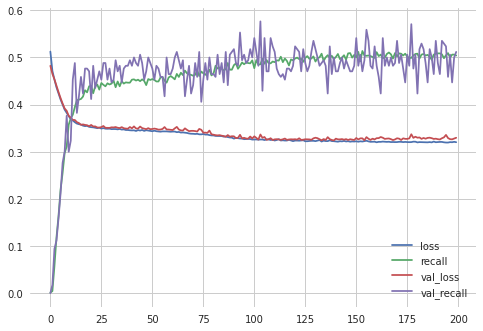

In [182]:
loss_df.plot()
plt.show()

In [183]:
model.evaluate(X_test, y_test, verbose=0)

[0.34787464141845703, 0.5130718946456909]

In [184]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[1124   70]
 [ 149  157]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1194
           1       0.69      0.51      0.59       306

    accuracy                           0.85      1500
   macro avg       0.79      0.73      0.75      1500
weighted avg       0.84      0.85      0.85      1500



In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show();

In [169]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [186]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [191]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)


TypeError: ignored

In [189]:
class_weights

NameError: ignored

In [ ]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

In [ ]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1 )

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

### Add Dropout Layer

In [ ]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss ="binary_crossentropy", metrics=['Recall'])

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=32,
          epochs=1000,
          verbose=1)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, class_weight=class_weights, epochs = 200, verbose = 1)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
# loss, recall = model.evaluate(X_test, y_test, verbose=0)
# print("loss: ", loss)
# print("recall: ", recall)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks = [early_stop])

#### Monitor the "val_recall" as metric

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## GridSearchCV

In [ ]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15,
                           restore_best_weights=True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train,class_weight=class_weights, callbacks = [early_stop])

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15,
                           restore_best_weights=True)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          batch_size=32,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", recall)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_cancer.h5')

## Prediction

In [ ]:
single_customer = df.drop(columns=['Churn']).iloc[0]
single_customer

In [ ]:
single_customer = column_trans .transform(single_customer.values.reshape(-1, 11)))
single_customer

In [ ]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___